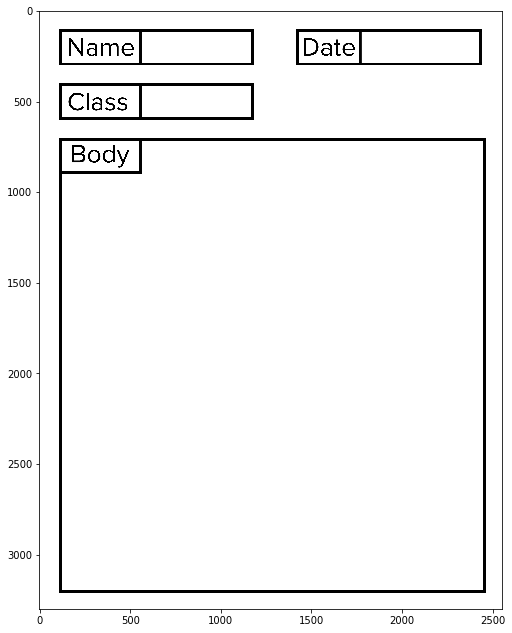

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("form.png", cv2.IMREAD_COLOR)
plt.rc('figure', figsize=(8.5, 11.0))

plt.imshow(img);

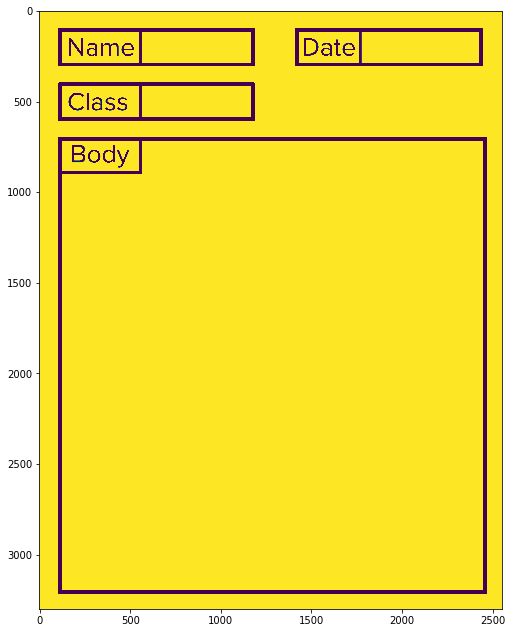

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)
_, contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

approx_contours = []
for i, cnt in enumerate(contours):
    if heirarchy[0][i][3] == 0:
        approx_contours.append(cnt)
contours = approx_contours

contoured = gray.copy()
cv2.drawContours(contoured, contours, -1, color=(0, 255, 0), thickness=10)
plt.imshow(contoured);

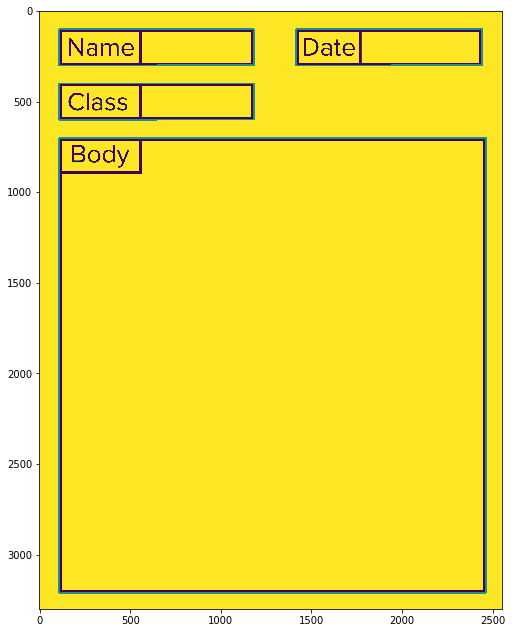

In [3]:
approx_contours = []
for c in contours:
    approx = cv2.approxPolyDP(c, 0.01 * cv2.arcLength(c, True), True)
    if len(approx) is 4:
        approx_contours.append(approx)
        
min_area = 5e4
approx_contours = [c for c in approx_contours if cv2.contourArea(c) > min_area]

contoured = gray.copy()
cv2.drawContours(contoured, approx_contours, -1, color=(127, 0, 127), thickness=7)

plt.imshow(contoured);

In [4]:
for i, cnt in enumerate(approx_contours):
    x, y, w, h = cv2.boundingRect(cnt)

    img = contoured[y:y+h, x:x+w]
    plt.imsave(f"contour-{i}.png", img);